# Decision Tree
 
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Company_Data = pd.read_csv("C:\\Excelr Data\\Assignments\\Decision Tree\\Company_Data.csv")
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
Company_Data.Sales

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [5]:
sales_quality = [] 
for value in Company_Data["Sales"]: 
    if value <= 7.496325: 
        sales_quality.append("low") 
    #elif value >=9.320000: 
    #    sales_quality.append("high") 
    else:
        sales_quality.append("high")
       
Company_Data["sales_quality"] =sales_quality    


In [6]:
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [7]:
Company_Data.drop(["Sales"],axis=1,inplace=True)

In [8]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


In [9]:
#x=Company_Data.iloc[:,0:10]
#x

In [10]:
#y=Company_Data.iloc[:,10]
#y

In [11]:
Company_Data['Urban'] = Company_Data['Urban'].apply(lambda x: 0 if x=='no' else 1)
Company_Data['US'] = Company_Data['US'].apply(lambda x: 0 if x=='no' else 1)


In [12]:
# Import label encoder 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 


In [13]:
Company_Data.ShelveLoc = label_encoder.fit_transform(Company_Data.ShelveLoc) 
Company_Data.ShelveLoc.unique() 


array([0, 1, 2])

In [14]:
Company_Data.ShelveLoc

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [15]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,1,low


In [16]:
Company_Data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
sales_quality    0
dtype: int64

In [17]:
Company_Data['sales_quality'].unique()


array(['high', 'low'], dtype=object)

In [18]:
Company_Data.sales_quality.value_counts()


low     201
high    199
Name: sales_quality, dtype: int64

In [19]:
colnames = list(Company_Data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales_quality']

In [20]:
predictors = colnames[:10]
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [21]:
target = colnames[10]
target

'sales_quality'

In [22]:
# Splitting data into training and testing data set

import numpy as np

In [23]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(Company_Data,test_size = 0.2, random_state=0)


In [24]:
from sklearn.tree import  DecisionTreeClassifier
#help(DecisionTreeClassifier)

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [26]:
model.fit(train[predictors],train[target])


DecisionTreeClassifier(criterion='entropy')

In [27]:
preds = model.predict(test[predictors])
#preds is predicted values of test data

In [28]:
type(preds)


numpy.ndarray

In [29]:
pd.Series(preds).value_counts()


high    42
low     38
dtype: int64

In [30]:
pd.crosstab(test[target],preds)


col_0,high,low
sales_quality,,
high,31,14
low,11,24


In [31]:
np.mean(preds==test.sales_quality) # Accuracy = Test


0.6875

In [32]:
temp = pd.Series(model.predict(train[predictors])).reset_index(drop=True)
temp

0       low
1      high
2       low
3       low
4      high
       ... 
315    high
316    high
317    high
318     low
319    high
Length: 320, dtype: object

In [33]:
np.mean(pd.Series(train.sales_quality).reset_index(drop=True) == pd.Series(model.predict(train[predictors])))
# Accuracy = train

1.0

## Boosting 

In [34]:
import xgboost as xgb
import pandas as pd

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
x,y=Company_Data.iloc[:,:10],Company_Data.iloc[:,10]


In [37]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.28,random_state= 10)


In [38]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(n_estimators=2000,learning_rate=0.3)
xgb1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [39]:
xgb1.fit(train_x,train_y)### Preparing XGB classifier 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
train_pred = xgb1.predict(train_x)
train_pred

array(['high', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'high',
       'low', 'high', 'low', 'high', 'low', 'low', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'low', 'high', 'low', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'high', 'high', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'high',
       'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low', 'h

In [41]:
import numpy as np
train_acc = np.mean(train_pred==train_y) 
train_acc

1.0

In [42]:
test_pred = xgb1.predict(test_x)
test_pred

array(['low', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low', 'low',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'high', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'low', 'low', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'high', 'high', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low'],
      dtype=object)

In [43]:
test_acc = np.mean(test_pred==test_y)
test_acc

0.8141592920353983

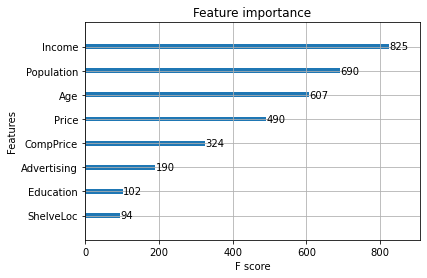

In [44]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)
